2024-01-11 15:40:57,158 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2024-01-11 15:40:57,159 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-11 15:40:57,161 INFO sqlalchemy.engine.Engine SELECT schema_name()
2024-01-11 15:40:57,161 INFO sqlalchemy.engine.Engine [generated in 0.00044s] ()
2024-01-11 15:40:57,163 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2024-01-11 15:40:57,163 INFO sqlalchemy.engine.Engine [generated in 0.00044s] ()
2024-01-11 15:40:57,164 INFO sqlalchemy.engine.Engine SELECT TOP (10) [idUFX_Ress_Equ] FROM [ICO_Activite].[dbo].[Listing_UF_V3]
2024-01-11 15:40:57,165 INFO sqlalchemy.engine.Engine [raw sql] ()
Connexion BDD - OK
Number of aggregation dimensions: 7
2024-01-11 15:40:57,167 INFO sqlalchemy.engine.Engine EXECUTE [dbo].[ReportCarePathActivtiy_By_actes] 2,'PARCOURS','',0,4,'PRESENCE',3,'Traitement',1,'Oncologie Medicale','V1'
2024-01-11 15:40:57,167 INFO sqlalchemy.engine.Engine [

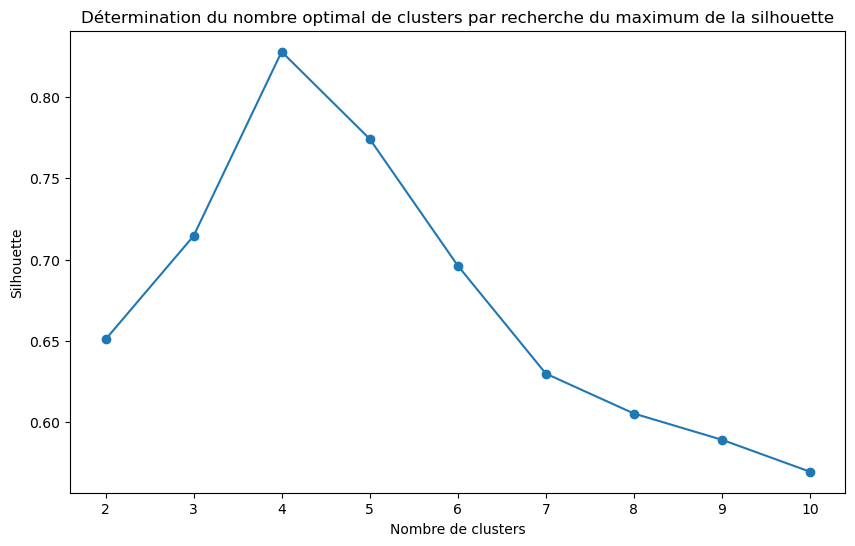

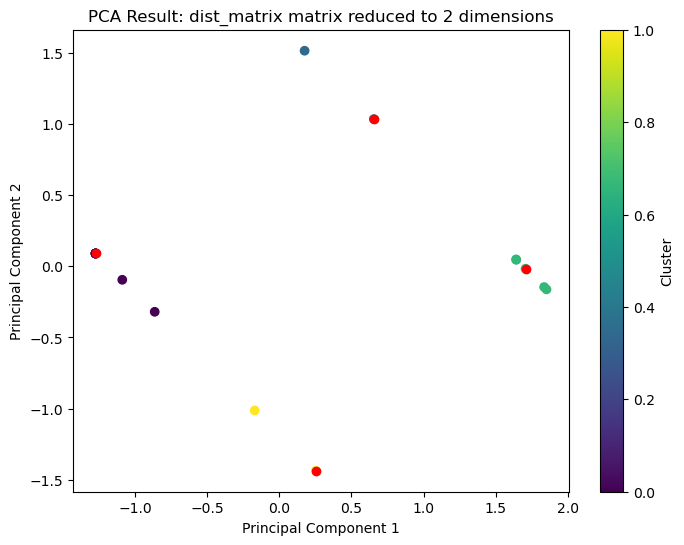

In [1]:
#test new clustering methods

import my_custom_func_Carepath_plotting as Mcfcp
import my_custom_func_Clustering as McfC
import my_custom_func_TS_Clust_1 as Mcftsc
import my_custom_func_config as Mcfconf
import mlflow 
import os
import pandas as pd

current_directory = os.getcwd()
file_path = os.path.join(current_directory, '00-Batch_configuration', 'export_config.csv')
config = pd.read_csv(file_path, encoding='ISO-8859-1')
Ac_config = config.iloc[0]

Create_dataset_parameters=Mcfconf.get_Create_dataset_parameters(Ac_config)
DSprefix=Ac_config['DS_Prefix']

Aggreg_parameters, Aggprefix=Mcfconf.get_Aggreg_param(Ac_config)
Aggreg_Patients=Mcftsc.get_Aggreg_Dataset3(Aggreg_parameters,Aggprefix)

Time_Clust_parameters=Mcfconf.set_Time_clust_parameters(Ac_config)

#MLFLOW SETUP
Experiment_name=Ac_config['Experiment']
Experiment_tag1=Ac_config['Experiment_tag_1']
Experiment_tag2=Ac_config['Experiment_tag_2']
Mcfconf.my_custom_func_MLFLOWconfig(Experiment_name,Experiment_tag1,Experiment_tag2)


My_List_NIP=Aggreg_Patients['df']['NIP']
DDT_Clust=McfC.prepare_clust_DDA_DDT(Create_dataset_parameters,DSprefix,My_List_NIP)
Time_Clust=DDT_Clust

Aggreg_Time_clust=McfC.cluster(Aggreg_Patients,Time_Clust,False,mlflow,Time_Clust_parameters )